# Assignment-4

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow matplotlib

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
'tf_flowers',
split=['train[:85%]', 'train[85%:]'],
shuffle_files=True,
as_supervised=True,
with_info=True,
)

In [ ]:
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [ ]:
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train[:85%]'].num_examples).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

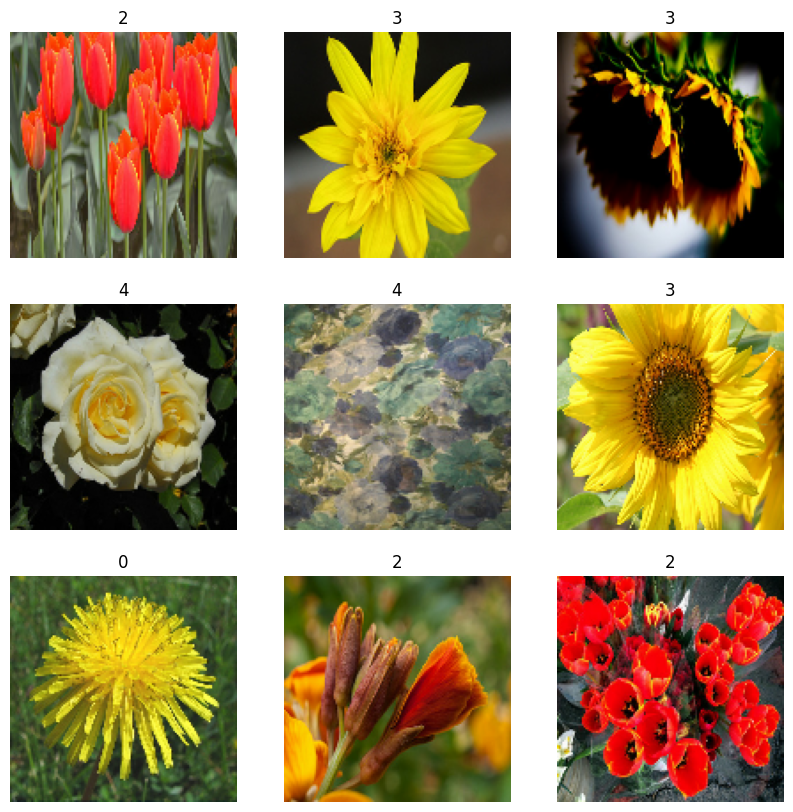

In [ ]:
for image, label in ds_train.take(1):
 plt.figure(figsize=(10, 10))
for i in range(9):
 ax = plt.subplot(3, 3, i + 1)
 plt.imshow(image[i])
 plt.title(int(label[i]))
 plt.axis("off")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(ds_train,
                    epochs=20,
                    validation_data=ds_test)

Epoch 1/20
98/98 [==============================] - 88s 885ms/step - loss: 1.4875 - accuracy: 0.4064 - val_loss: 1.0481 - val_accuracy: 0.5982
Epoch 2/20
98/98 [==============================] - 88s 896ms/step - loss: 0.9719 - accuracy: 0.6256 - val_loss: 1.0318 - val_accuracy: 0.5873
Epoch 3/20
98/98 [==============================] - 82s 837ms/step - loss: 0.6965 - accuracy: 0.7478 - val_loss: 0.9713 - val_accuracy: 0.6291
Epoch 4/20
98/98 [==============================] - 78s 793ms/step - loss: 0.3802 - accuracy: 0.8718 - val_loss: 1.0737 - val_accuracy: 0.6273
Epoch 5/20
98/98 [==============================] - 81s 829ms/step - loss: 0.1988 - accuracy: 0.9452 - val_loss: 1.3751 - val_accuracy: 0.6436
Epoch 6/20
98/98 [==============================] - 75s 769ms/step - loss: 0.0860 - accuracy: 0.9788 - val_loss: 1.5388 - val_accuracy: 0.6436
Epoch 7/20
98/98 [==============================] - 79s 804ms/step - loss: 0.0641 - accuracy: 0.9856 - val_loss: 1.5860 - val_accuracy: 0.6345

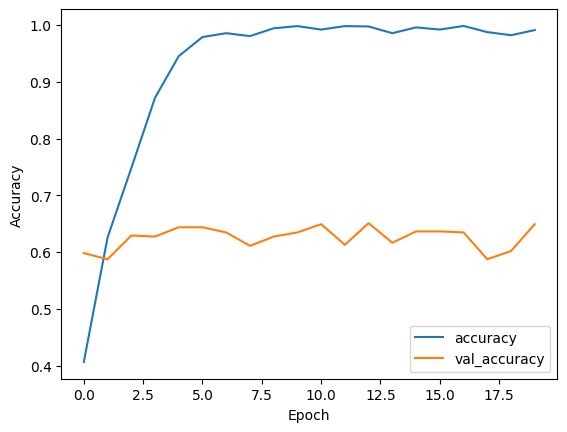

In [ ]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#Save the model
model.save('/content/drive/My Drive/flower_classification_model.h5')
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test_loss, test_acc = model.evaluate(ds_test)
print(f'Test Accuracy: {test_acc}')

18/18 [==============================] - 7s 366ms/step - loss: 2.2661 - accuracy: 0.6491
Test Accuracy: 0.6490908861160278


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array


In [ ]:
#Path to a new image
img_path = '/content/-_Flower_02_-.jpg'

# Load and preprocess the image
new_image = load_and_preprocess_image(img_path)

In [ ]:
# Make a prediction
predictions = model.predict(new_image)
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')


1/1 [==============================] - 0s 134ms/step
Predicted class: [4]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
# Function to load and preprocess an image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img, img_array

In [ ]:
# Path to the uploaded image
img_path = '/content/-_Flower_02_-.jpg'  # Ensure this path is correct

In [ ]:
# Load and preprocess the image
image_to_show, new_image = load_and_preprocess_image(img_path)

In [ ]:
# Make a prediction
predictions = model.predict(new_image)
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Define the class names
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']



1/1 [==============================] - 0s 55ms/step


In [ ]:
# Map the index to the class name
predicted_class_name = class_names[predicted_class_index]

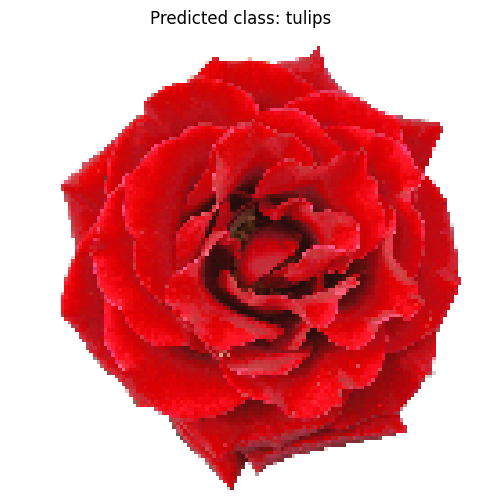

Predicted class index: 4
Predicted class name: tulips


In [ ]:
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image_to_show)
plt.axis('off')
plt.title(f'Predicted class: {predicted_class_name}')
plt.show()

print(f'Predicted class index: {predicted_class_index}')
print(f'Predicted class name: {predicted_class_name}')

In [ ]:
!pip install tensorflow matplotlib